# CNN Model with KERAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
!ls

model_fashion_mnist.keras  sample_data


In [ ]:
!pip install -q keras

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os
from matplotlib import cm
from keras import backend as K


%matplotlib inline
import random


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


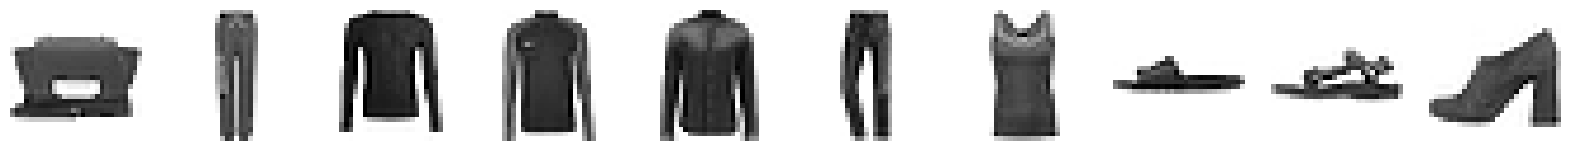

In [ ]:
num_images = 10

# Create subplots
fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

# Display images
for i in range(num_images):
    axes[i].imshow(x_train[999 + i], cmap=cm.binary)  # Display each image individually
    axes[i].axis('off')  # Turn off axes for cleaner display

plt.show()

In [ ]:
batch_size = 128
num_classes = 10
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:

model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

In [ ]:

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [ ]:
model.save('model_fashion_mnist.keras')

In [ ]:
fashion_mnist_model_v1 = load_model('model_fashion_mnist.keras')

In [ ]:
fashion_mnist_labels = ["T-shirt/top",
                        "Trouser",
                        "Pullover",
                        "Dress",
                        "Coat",
                        "Sandal",
                        "Shirt",
                        "Sneaker",
                        "Bag",
                        "Ankle boot"]

In [ ]:
root= '/content/drive/MyDrive/Colab Notebooks/model_fashion_mnist.keras'
from keras.models import load_model
if os.path.exists(root):
  model = load_model(root)


1/1 [==============================] - 0s 61ms/step
Prediction:  T-shirt/top
Actual:  T-shirt/top
1/1 [==============================] - 0s 64ms/step
Prediction:  Sneaker
Actual:  Sandal
1/1 [==============================] - 0s 217ms/step
Prediction:  Trouser
Actual:  Trouser
1/1 [==============================] - 0s 206ms/step
Prediction:  Ankle boot
Actual:  Ankle boot
1/1 [==============================] - 0s 95ms/step
Prediction:  Pullover
Actual:  Pullover
1/1 [==============================] - 0s 117ms/step
Prediction:  Trouser
Actual:  Trouser
1/1 [==============================] - 0s 84ms/step
Prediction:  Sneaker
Actual:  Sandal
1/1 [==============================] - 0s 95ms/step
Prediction:  Pullover
Actual:  Shirt
1/1 [==============================] - 0s 62ms/step
Prediction:  Dress
Actual:  T-shirt/top
1/1 [==============================] - 0s 40ms/step
Prediction:  Sandal
Actual:  Sandal
1/1 [==============================] - 0s 45ms/step
Prediction:  Pullover
Actual:  P

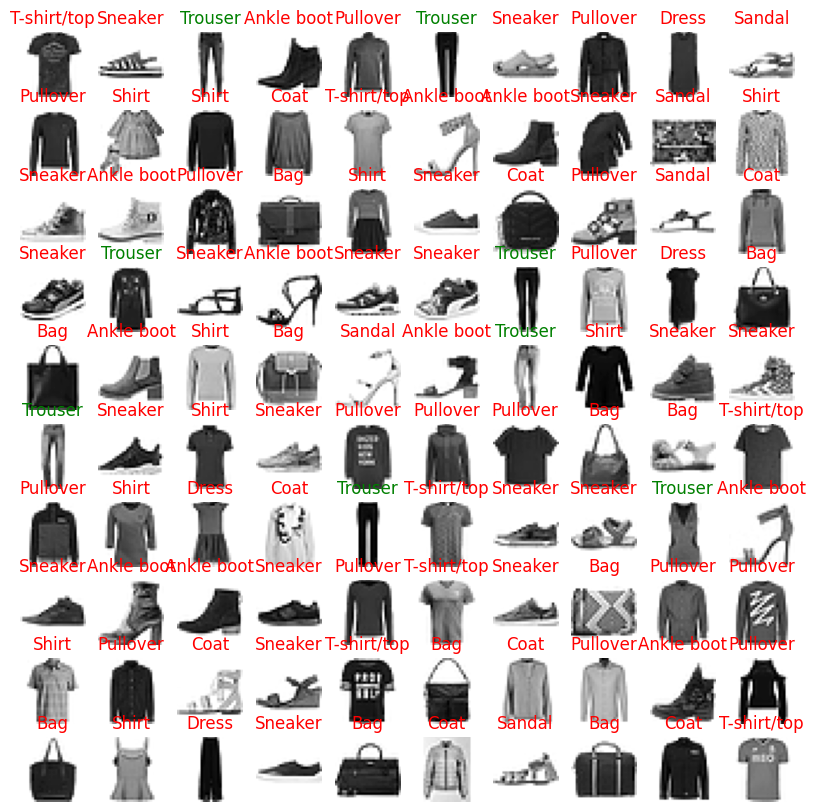

In [ ]:
from operator import index
def convertMnistData(image):
  img=image.astype('float32')
  img=img/255
  return image.reshape(1,28,28,1)

plt.figure(figsize=(10, 10))

right=0
wrong=0
prefictionNum=100 # Changed to match the subplot grid size

for i in range(prefictionNum):
  index=random.randint(0,x_test.shape[0])
  image=x_test[index]
  data=convertMnistData(image)

  plt.subplot(10,10,i+1)
  plt.imshow(image,cmap=cm.gray_r)
  plt.axis('off')

  ret=model.predict(data,batch_size=1)
  #print(ret)

  bestnum=0
  bestclass=0
  for j in range(10):
    if bestnum<ret[0][j]:
      bestnum=ret[0][j]
      bestclass=j

  if bestclass==y_test[index].any():
    plt.title(fashion_mnist_labels[bestclass], color='green')
    right+=1
  else:
    plt.title(fashion_mnist_labels[bestclass], color='red')
    wrong+=1

  print('Prediction: ',fashion_mnist_labels[bestclass])
  print('Actual: ',fashion_mnist_labels[np.argmax(y_test[index])])
print('-' * 30)
print('right prediction num:',right)
print('wrong prediciton num:',wrong)
print('prediction rate:',right/(right+wrong))

plt.show()

# CNN Model with PyTorch

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [58]:
!ls

 bee_wasp_classification_deeplearning.ipynb
 bee_wasps_docker_aws.ipynb
 best_model_v1.hdf5
 best_model_v2.hdf5
 Bureau-BureauBalance.ipynb
 CENTOSTRAIN
 challenges-in-representation-learning-facial-expression-recognition-challenge.zip
 CNN_midlevel.ipynb
'comparing_CNN_Models (1).ipynb'
 comparing_CNN_Models.ipynb
'Copy of PandasAI demo.ipynb'
 data
 dcgan.gif
 DeepDream.ipynb
 demand_forecasting.ipynb
 DL_practice.ipynb
 emojis
 Emotion_recognition_CNN.ipynb
 example_submission.csv
 Fashion_MNIST_CNN.ipynb
 fer2013
 fer2013.tar.gz
 Generating_synthetic_images_via_keras_DCGAN.ipynb
 House_Price_Model_Deployment_main
 icml_face_data.csv
 image_at_epoch_0001.png
 image_at_epoch_0002.png
 image_at_epoch_0003.png
 image_at_epoch_0004.png
 image_at_epoch_0005.png
 image_at_epoch_0006.png
 image_at_epoch_0007.png
 image_at_epoch_0008.png
 image_at_epoch_0009.png
 image_at_epoch_0010.png
 IMAGENET_ResNet50_object_identification.ipynb
 IMAGENET_VGG16_object_identification.ipynb
 images_ANN
 I

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [60]:
# Define the transformation
transform = transforms.ToTensor()

# Load the dataset
train_dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

# Convert to CSV
def convert_to_csv(dataset, filename):
    data_list = []
    for img, label in dataset:
        img = img.numpy().reshape(-1).tolist()
        data_list.append([label] + img)
    df = pd.DataFrame(data_list)
    df.to_csv(filename, index=False)

# Save to CSV files
convert_to_csv(train_dataset, 'fashion_mnist_train.csv')
convert_to_csv(test_dataset, 'fashion_mnist_test.csv')


In [22]:
train = pd.read_csv('fashion_mnist_train.csv',header=0,dtype=float)
print(train.head())
test = pd.read_csv('fashion_mnist_test.csv',header=0,dtype=float)
print(test.head())

     0    1    2    3    4    5         6    7    8         9  ...       775  \
0  9.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...  0.000000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.000000  ...  0.466667   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...  0.000000   
3  3.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.129412  ...  0.000000   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...  0.000000   

        776       777       778  779  780  781  782  783  784  
0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.447059  0.509804  0.298039  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.003922  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]
     0    1    2    3         4    5         6         7    8         9  ...  \
0  9.0  0.0  0.0  0.0  0.000000

In [23]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [35]:
target_numpy = train['0']
feature_numpy = train.loc[:,train.columns != '0'].values/255 # Divide by 255 to normalize data


In [37]:
target_numpy.head()
target_numpy.shape

(60000,)

In [41]:
feature_train, feature_test, target_train, target_test = train_test_split(feature_numpy, target_numpy, test_size=0.1, random_state=42)


In [42]:
featuresTrain=torch.from_numpy(feature_train)
targetsTrain=torch.from_numpy(target_train.values).type(torch.LongTensor)
featuresTest=torch.from_numpy(feature_test)
targetsTest=torch.from_numpy(target_test.values).type(torch.LongTensor)

In [45]:
batch_size = 64
number_of_iterations = 100
num_epochs= number_of_iterations / (len(featuresTrain) / batch_size)
num_epochs= int(num_epochs)
print(num_epochs)

train=torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test=torch.utils.data.TensorDataset(featuresTest,targetsTest)
train_loader=DataLoader(train,batch_size=batch_size,shuffle=False)
test_loader=DataLoader(test,batch_size=batch_size,shuffle=False)


0


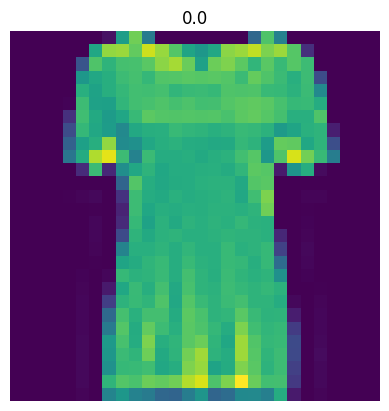

In [50]:
plt.imshow(feature_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(target_numpy[10]))
plt.show()

In [61]:

class FashionMNISTCSV(Dataset):
    def __init__(self, csv_file):
        self.data_frame = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        row = self.data_frame.iloc[idx]
        label = torch.tensor(int(row[0]), dtype=torch.long)
        image = torch.tensor(row[1:].values, dtype=torch.float32).reshape(1, 28, 28)
        return image, label

# Create datasets
train_csv_dataset = FashionMNISTCSV('fashion_mnist_train.csv')
test_csv_dataset = FashionMNISTCSV('fashion_mnist_test.csv')

# Create data loaders
train_loader = DataLoader(train_csv_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_csv_dataset, batch_size=64, shuffle=False)

# Define the neural network model
class AnnModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(AnnModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        self.layer3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        self.layer4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.tanh2(out)
        out = self.layer3(out)
        out = self.elu3(out)
        out = self.layer4(out)
        return out

# Initialize the model, criterion, and optimizer
input_dim = 28 * 28
hidden_dim = 128
output_dim = 10

model = AnnModel(input_dim, hidden_dim, output_dim)
model = model.float()  # Ensure the model uses float32

criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print(model)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for images, labels in train_loader:
        # Flatten images to (batch_size, 784)
        images = images.view(images.size(0), -1)

        # Convert images to float32
        images = images.float()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/10], Loss: {running_loss/len(train_loader):.4f}')

# Testing loop
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        # Flatten images to (batch_size, 784)
        images = images.view(images.size(0), -1)

        # Convert images to float32
        images = images.float()

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


AnnModel(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (tanh2): Tanh()
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (elu3): ELU(alpha=1.0)
  (layer4): Linear(in_features=128, out_features=10, bias=True)
)
Epoch [1/10], Loss: 2.2826
Epoch [2/10], Loss: 2.2158
Epoch [3/10], Loss: 2.0645
Epoch [4/10], Loss: 1.7904
Epoch [5/10], Loss: 1.5330
Epoch [6/10], Loss: 1.3479
Epoch [7/10], Loss: 1.2128
Epoch [8/10], Loss: 1.1122
Epoch [9/10], Loss: 1.0364
Epoch [10/10], Loss: 0.9772
Accuracy: 63.37%
